# DATA SET: SVHN_single_grey1.h5
### Author: Kranti Sambhaji Walke
### Data Description:
SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

# ● Data fetching and understand the train/val/test splits.

## 1.Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import h5py

## 2.Read and transform data

In [2]:
h5f=h5py.File('SVHN_single_grey1.h5','r')

# ● Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)

## 1.Load Train and test data

In [3]:
# Load Train and test data

X_train=h5f['X_train'][:]
y_train=h5f['y_train'][:]
X_test=h5f['X_test'][:]
y_test=h5f['y_test'][:]

In [4]:
X_train.shape

(42000, 32, 32)

In [5]:
y_train.shape

(42000,)

In [6]:
X_test.shape

(18000, 32, 32)

In [7]:
y_test.shape

(18000,)

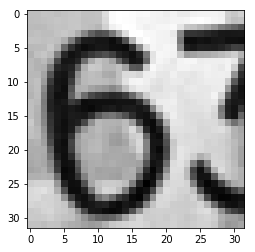

Label:  6


In [8]:
plt.imshow(X_train[1], cmap='gray')    # show first number in the dataset
plt.show()
print('Label: ', y_train[1])

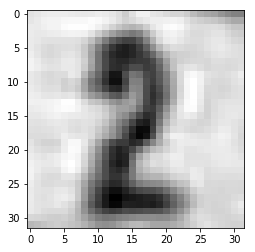

Label:  2


In [9]:
plt.imshow(X_test[2], cmap='gray')    # show first number in the dataset
plt.show()
print('Label: ', y_test[2])

## 2.Visualizing the first 10 images in the dataset and their labels

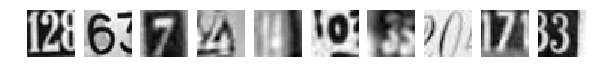

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [10]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [11]:
## Convert output label to multiple values

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

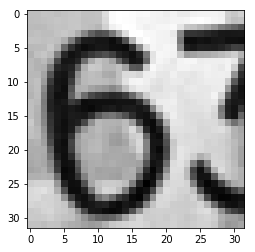

Label:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [12]:
plt.imshow(X_train[1], cmap='gray')    # show first number in the dataset
plt.show()
print('Label: ', y_train[1])

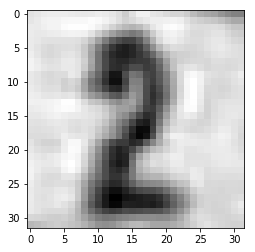

Label:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
plt.imshow(X_test[2], cmap='gray')    # show first number in the dataset
plt.show()
print('Label: ', y_test[2])

## 3.Data Pre-processing

In [14]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42000, 1024) (18000, 1024) (42000, 10) (18000, 10)


# ● Implement and apply an optimal k-Nearest Neighbor (kNN) classifier

## 1.kNN model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [17]:
X = X_train
y = y_train

from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 10 , weights = 'distance')
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='distance')

In [18]:
X_train.shape

(42000, 1024)

In [19]:
y_train.shape

(42000, 10)

In [20]:
predicted_labels = NNH.predict(X_test)

# ● Print the classification metric report

In [21]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.84      0.33      0.47      1814
           1       0.79      0.43      0.56      1828
           2       0.94      0.27      0.42      1803
           3       0.85      0.15      0.26      1719
           4       0.93      0.42      0.58      1812
           5       0.88      0.15      0.25      1768
           6       0.82      0.17      0.28      1832
           7       0.94      0.45      0.61      1808
           8       0.77      0.13      0.22      1812
           9       0.91      0.20      0.32      1804

   micro avg       0.87      0.27      0.41     18000
   macro avg       0.87      0.27      0.40     18000
weighted avg       0.87      0.27      0.40     18000
 samples avg       0.27      0.27      0.27     18000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [23]:
print(accuracy_score(y_test, predicted_labels))

0.2702222222222222


In [24]:
myList = list(range(1,9))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [25]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


In [27]:
#Use k=1 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))
#print(recall_score(y_test, y_pred))

0.45916666666666667


In [28]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average = 'micro'))

0.45916666666666667


In [29]:
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:197: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:197: UserWarning: Numerical

In [30]:
NNH1 = KNeighborsClassifier(n_neighbors= 1 , weights = 'distance')

In [31]:
NNH1.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='distance')

## Predict the Response and evaluate Accuracy

In [32]:
# predict the response
y_pred = NNH1.predict(X_test_scaled)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.4677222222222222


In [33]:
print(NNH1.score(X_train_scaled, y_train))
print(NNH1.score(X_test_scaled, y_test))

1.0
0.4677222222222222


# ● Implement batch normalization for training the neural network

In [34]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42000, 1024) (18000, 1024) (42000, 10) (18000, 10)


In [35]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

Using TensorFlow backend.


## 1.Batch Normalization (with RELU activations)
Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective

In [37]:
from keras.layers import BatchNormalization, Dropout

Batch normalization layer is usually inserted after dense/convolution and before nonlinearity

In [38]:
def mlp_model():
    model1 = Sequential()
    
    model1.add(Dense(400, input_shape = (1024, )))
    model1.add(BatchNormalization())                    
    model1.add(Activation('relu'))    
    model1.add(Dense(300))
    model1.add(BatchNormalization())                    
    model1.add(Activation('relu'))    
    model1.add(Dense(200))
    model1.add(BatchNormalization())                    
    model1.add(Activation('relu'))    
    model1.add(Dense(200))
    model1.add(BatchNormalization())                    
    model1.add(Activation('relu'))    
    model1.add(Dense(10))
    model1.add(Activation('softmax'))
    
    
    model1.compile(optimizer = 'adam', loss = 'MSE', metrics = ['accuracy'])
    
    return model1

In [39]:
model1 = mlp_model()
history = model1.fit(X_train, y_train, batch_size=100 , epochs = 100, verbose = 1)

Epoch 1/100
42000/42000 [==============================] - 13s 315us/step - loss: 0.0547 - accuracy: 0.5700
Epoch 2/100
42000/42000 [==============================] - 6s 144us/step - loss: 0.0381 - accuracy: 0.7200
Epoch 3/100
42000/42000 [==============================] - 6s 143us/step - loss: 0.0326 - accuracy: 0.7621
Epoch 4/100
42000/42000 [==============================] - 6s 141us/step - loss: 0.0290 - accuracy: 0.7909
Epoch 5/100
42000/42000 [==============================] - 6s 143us/step - loss: 0.0270 - accuracy: 0.8051
Epoch 6/100
42000/42000 [==============================] - 7s 160us/step - loss: 0.0256 - accuracy: 0.8172
Epoch 7/100
42000/42000 [==============================] - 7s 168us/step - loss: 0.0238 - accuracy: 0.8310
Epoch 8/100
42000/42000 [==============================] - 8s 180us/step - loss: 0.0227 - accuracy: 0.8384
Epoch 9/100
42000/42000 [==============================] - 8s 187us/step - loss: 0.0215 - accuracy: 0.8470
Epoch 10/100
42000/42000 [==========

In [40]:
results1 = model1.evaluate(X_test, y_test)

18000/18000 [==============================] - 5s 251us/step


In [41]:
print('Test accuracy: ', results1[1])

Test accuracy:  0.8559444546699524


## 2.Dropout

In [42]:
def mlp_model():
    model2 = Sequential()
    
    model2.add(Dense(400, input_shape = (1024, ), kernel_initializer='he_normal'))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    model2.add(Dropout(rate=1))
    model2.add(Dense(300, kernel_initializer='he_normal'))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))    
    model2.add(Dropout(rate=1))
    model2.add(Dense(200, kernel_initializer='he_normal'))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    model2.add(Dropout(rate=1))
    model2.add(Dense(200, kernel_initializer='he_normal'))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    model2.add(Dropout(rate=1))
    model2.add(Dense(10, kernel_initializer='he_normal'))
    model2.add(Activation('softmax'))
    
    
    model2.compile(optimizer = 'adam', loss = 'MSE', metrics = ['accuracy'])
    
    return model2

In [43]:
model2 = mlp_model()
history = model2.fit(X_train, y_train,batch_size=100, epochs = 100, verbose = 1)

Epoch 1/100
42000/42000 [==============================] - 8s 200us/step - loss: 0.0547 - accuracy: 0.5692
Epoch 2/100
42000/42000 [==============================] - 7s 159us/step - loss: 0.0374 - accuracy: 0.7258
Epoch 3/100
42000/42000 [==============================] - 7s 162us/step - loss: 0.0323 - accuracy: 0.7657
Epoch 4/100
42000/42000 [==============================] - 7s 170us/step - loss: 0.0291 - accuracy: 0.7913
Epoch 5/100
42000/42000 [==============================] - 7s 164us/step - loss: 0.0268 - accuracy: 0.8087
Epoch 6/100
42000/42000 [==============================] - 7s 174us/step - loss: 0.0252 - accuracy: 0.8182
Epoch 7/100
42000/42000 [==============================] - 7s 172us/step - loss: 0.0235 - accuracy: 0.8325
Epoch 8/100
42000/42000 [==============================] - 7s 171us/step - loss: 0.0225 - accuracy: 0.8392
Epoch 9/100
42000/42000 [==============================] - 7s 164us/step - loss: 0.0211 - accuracy: 0.8516
Epoch 10/100
42000/42000 [===========

In [44]:
results2 = model2.evaluate(X_test, y_test)

18000/18000 [==============================] - 2s 86us/step


In [45]:
print('Test accuracy: ', results2[1])

Test accuracy:  0.8592222332954407


In [46]:
def mlp_model1():
    model1 = Sequential()
    
    model1.add(Dense(400, input_shape = (1024, ), kernel_initializer='he_normal'))
    model1.add(BatchNormalization())
    model1.add(Activation('relu'))
    model1.add(Dropout(rate=1))
    model1.add(Dense(300, kernel_initializer='he_normal'))
    model1.add(BatchNormalization())
    model1.add(Activation('relu'))    
    model1.add(Dropout(rate=1))
    model1.add(Dense(200, kernel_initializer='he_normal'))
    model1.add(BatchNormalization())
    model1.add(Activation('relu'))
    model1.add(Dropout(rate=1))
    model1.add(Dense(200, kernel_initializer='he_normal'))
    model1.add(BatchNormalization())
    model1.add(Activation('relu'))
    model1.add(Dropout(rate=1))
    model1.add(Dense(10, kernel_initializer='he_normal'))
    model1.add(Activation('softmax'))
    
    
    model1.compile(optimizer = 'adam', loss = 'MSE', metrics = ['accuracy'])
    
    return model1

In [47]:
model3 = mlp_model1()
history = model3.fit(X_train, y_train,batch_size=100, epochs = 100, verbose = 1)

Epoch 1/100
42000/42000 [==============================] - 7s 169us/step - loss: 0.0553 - accuracy: 0.5653
Epoch 2/100
42000/42000 [==============================] - 7s 157us/step - loss: 0.0382 - accuracy: 0.7180
Epoch 3/100
42000/42000 [==============================] - 6s 155us/step - loss: 0.0329 - accuracy: 0.7606
Epoch 4/100
42000/42000 [==============================] - 7s 155us/step - loss: 0.0293 - accuracy: 0.7888
Epoch 5/100
42000/42000 [==============================] - 7s 158us/step - loss: 0.0270 - accuracy: 0.8081
Epoch 6/100
42000/42000 [==============================] - 6s 153us/step - loss: 0.0253 - accuracy: 0.8195
Epoch 7/100
42000/42000 [==============================] - 6s 153us/step - loss: 0.0234 - accuracy: 0.8325
Epoch 8/100
42000/42000 [==============================] - 7s 155us/step - loss: 0.0226 - accuracy: 0.8383
Epoch 9/100
42000/42000 [==============================] - 7s 155us/step - loss: 0.0213 - accuracy: 0.8495
Epoch 10/100
42000/42000 [===========

In [48]:
results3 = model3.evaluate(X_test, y_test)

18000/18000 [==============================] - 2s 85us/step


In [49]:
print('Test accuracy: ', results3[1])

Test accuracy:  0.8539999723434448


# ● Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) 
# ● Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) 
# ● Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics1

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import h5py

from tensorflow.python import keras

In [106]:
h5f=h5py.File('SVHN_single_grey1.h5','r')
# Load Train and test data

X_train=h5f['X_train'][:]
y_train=h5f['y_train'][:]
X_test=h5f['X_test'][:]
y_test=h5f['y_test'][:]

In [107]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42000, 1024) (18000, 1024) (42000,) (18000,)


## 1. Build Fully connected layer(linear layer)

In [108]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [109]:
import numpy as np 

class Linear():
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size) * 0.01
        self.b = np.zeros((1, out_size))
        self.params = [self.W, self.b]
        self.gradW = None
        self.gradB = None
        self.gradInput = None        

    def forward(self, X):
        self.X = X
        self.output = np.dot(X, self.W) + self.b
        return self.output

    def backward(self, nextgrad):
        self.gradW = np.dot(self.X.T, nextgrad)
        self.gradB = np.sum(nextgrad, axis=0)
        self.gradInput = np.dot(nextgrad, self.W.T)
        return self.gradInput, [self.gradW, self.gradB]

## 2. Build Rectified Linear Activation Layer (ReLU) 

In [110]:
class ReLU():
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X):
        self.output = np.maximum(X, 0)
        return self.output

    def backward(self, nextgrad):
        self.gradInput = nextgrad.copy()
        self.gradInput[self.output <=0] = 0
        return self.gradInput, []

## 3. Define the softmax function

In [111]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

## 4. Define the Cross Entropy Loss 

In [112]:
class CrossEntropy:
    def forward(self, X, y):
        self.m = y.shape[0]
        self.p = softmax(X)
        cross_entropy = -np.log(self.p[range(self.m), y]+1e-16)
        loss = np.sum(cross_entropy) / self.m
        return loss
    
    def backward(self, X, y):
        y_idx = y.argmax()        
        grad = softmax(X)
        grad[range(self.m), y] -= 1
        grad /= self.m
        return grad

## 5. Analyze the data

In [113]:
from keras.utils import np_utils

# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# # normalize inputs from 0-100 to 0-1
train_features = X_train / 100.0
test_features = X_test / 100.0

print(y_train.shape)
print(y_test.shape)

X_train = train_features
y_train = y_train

X_val = test_features
y_val = y_test
print(train_features.shape)
print(test_features.shape)

(42000,)
(18000,)
(42000, 1024)
(18000, 1024)


## 6. Here, we define the container NN class that enables the forward prop and backward propagation of the entire network. Note, how this class enables us to add layers of different types and also correctly pass gradients using the chain rule. 

In [114]:
class NN():
    def __init__(self, lossfunc=CrossEntropy(), mode='train'):
        self.params = []
        self.layers = []
        self.loss_func = lossfunc
        self.grads = []
        self.mode = mode
        
    def add_layer(self, layer):
        self.layers.append(layer)
        self.params.append(layer.params)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def backward(self, nextgrad):
        self.clear_grad_param()
        for layer in reversed(self.layers):
            nextgrad, grad = layer.backward(nextgrad)
            self.grads.append(grad)
        return self.grads
    
    def train_step(self, X, y):
        out = self.forward(X)
        loss = self.loss_func.forward(out,y)
        nextgrad = self.loss_func.backward(out,y)
        grads = self.backward(nextgrad)
        return loss, grads
    
    def predict(self, X):
        X = self.forward(X)
        p = softmax(X)
        return np.argmax(p, axis=1)
    
    def predict_scores(self, X):
        X = self.forward(X)
        p = softmax(X)
        return p
    
    def clear_grad_param(self):
        self.grads = []

## 7.Defining the update function (SGD with momentum)

In [115]:
def update_params(velocity, params, grads, learning_rate=0.01, mu=0.9):
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = mu * v[i] - learning_rate * g[i]
            p[i] += v[i]

## 8.Defining a function which gives us the minibatches (both the datapoint and the corresponding label)

In [116]:
# get minibatches
def minibatch(X, y, minibatch_size):
    n = X.shape[0]
    minibatches = []
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    
    for i in range(0, n , minibatch_size):
        X_batch = X[i:i + minibatch_size, :]
        y_batch = y[i:i + minibatch_size, ]
        minibatches.append((X_batch, y_batch))
        
    return minibatches

## 9.The traning loop

In [117]:
def train(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu=0.9, X_val=None, y_val=None):
    val_loss_epoch = []
    #X_val = X_test #test_features
    #y_val = y_test
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)

    
    for i in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)
            
        # iterate over mini batches
        for X_mini, y_mini in minibatches:
            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update_params(velocity, net.params, grads, learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini, y_mini)
            val_loss_batch.append(val_loss)
        
        # accuracy of model at end of epoch after all mini batch updates
        m_train = X_train.shape[0]
        m_val = X_val.shape[0]
        y_train_pred = np.array([], dtype="int64")
        y_val_pred = np.array([], dtype="int64")
        y_train1 = []
        y_vall = []
        for i in range(0, m_train, minibatch_size):
            X_tr = X_train[i:i + minibatch_size, : ]
            y_tr = y_train[i:i + minibatch_size,]
            y_train1 = np.append(y_train1, y_tr)
            y_train_pred = np.append(y_train_pred, net.predict(X_tr))

        for i in range(0, m_val, minibatch_size):
            X_va = X_val[i:i + minibatch_size, : ]
            y_va = y_val[i:i + minibatch_size,]
            y_vall = np.append(y_vall, y_va)
            y_val_pred = np.append(y_val_pred, net.predict(X_va))
            
        train_acc = check_accuracy(y_train1, y_train_pred)
        val_acc = check_accuracy(y_vall, y_val_pred)

        mean_train_loss = sum(loss_batch) / float(len(loss_batch))
        mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
        
        val_loss_epoch.append(mean_val_loss)
        print("Loss = {0} | Training Accuracy = {1} | Val Loss = {2} | Val Accuracy = {3}".format(mean_train_loss, train_acc, mean_val_loss, val_acc))
    return net

## 10.Checking the accuracy of the model

In [118]:
def check_accuracy(y_true, y_pred):
    return np.mean(y_pred == y_true)

## 11.Invoking all that we have created until now

In [119]:
from random import shuffle

## input size
input_dim = X_train.shape[1]

## hyperparameters
iterations = 10
learning_rate = 1e4
hidden_nodes = 32
output_nodes = 10

## define neural net
nn = NN()
nn.add_layer(Linear(input_dim, hidden_nodes))
nn.add_layer(ReLU())
nn.add_layer(Linear(hidden_nodes, output_nodes))

nn = train(nn, X_train , y_train, minibatch_size=200, epoch=10, \
           learning_rate=learning_rate, X_val=X_val, y_val=y_val)

Loss = 32.97001997725197 | Training Accuracy = 0.09923809523809524 | Val Loss = 33.34143214655384 | Val Accuracy = 0.10177777777777777
Loss = 33.12121392581337 | Training Accuracy = 0.09971428571428571 | Val Loss = 33.34143214655384 | Val Accuracy = 0.10066666666666667
Loss = 33.11862962707929 | Training Accuracy = 0.0998095238095238 | Val Loss = 33.525638953993294 | Val Accuracy = 0.10044444444444445
Loss = 33.1414361841798 | Training Accuracy = 0.09923809523809524 | Val Loss = 33.34143214655384 | Val Accuracy = 0.10177777777777777
Loss = 33.126837857894294 | Training Accuracy = 0.0998095238095238 | Val Loss = 33.525638953993294 | Val Accuracy = 0.10044444444444445
Loss = 33.1366413732118 | Training Accuracy = 0.10192857142857142 | Val Loss = 33.525638953993294 | Val Accuracy = 0.0955
Loss = 33.16129943586153 | Training Accuracy = 0.09992857142857142 | Val Loss = 31.68357087959807 | Val Accuracy = 0.10016666666666667
Loss = 33.08091109031787 | Training Accuracy = 0.09971428571428571 |

## 12.fprop a single image and showing its prediction

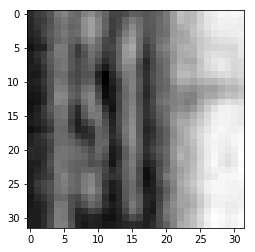

In [120]:
plt.imshow(X_val[0].reshape(32,32), cmap='gray')

In [121]:
# Predict Scores for each class
prediction = nn.predict_scores(X_val[0])[0]

In [122]:
print("Scores")
print(prediction)

Scores
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [123]:
np.argmax(prediction)

7

In [124]:
predict_class = nn.predict(X_val[0])[0]
predict_class

7

In [126]:
# Original class
y_val[1]

7

In [127]:
predicted_labels=nn.predict(X_val)

In [128]:
from sklearn import metrics
print(metrics.classification_report(predicted_labels,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       1.00      0.10      0.18     18000
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

   micro avg       0.10      0.10      0.10     18000
   macro avg       0.10      0.01      0.02     18000
weighted avg       1.00      0.10      0.18     18000



# Conclusion:
## From above we can conclude that for the given data set ,the classification report from kNN classifier is better than the NN classifier.